<a href="https://colab.research.google.com/github/mnshtxp/ds_proj04/blob/main/Project04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

금융 맞춤 비서

‘내가 지금 어떻게 소비하고 있어? 잘 하고 있는건가?’
라는 질문에 정해진 답은 없을 겁니다.
어떻게 하는게 맞는건지 모를 땐 다른 사람이 먼저 간 길을 따라가는게 지름 길이 될 수는 있을겁니다.
하지만 기준이 필요하겠죠.
소비를 잘 하고 있다는 기준을 개인 맞춤으로 다양화를 하고 그에 맞는 추천을 제공하여 사용자의 소비생활에 도움을 주는 모델 생성.

사용자가 원하는 방향으로 소비 가이드를 제시해주는 추천 모델.  


In [ ]:
# 데이터 불러오기
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/mnshtxp/dataset/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 데이터 확인
print(df.shape)
df.head().T

(7043, 21)


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
df.tail().T

,7038,7039,7040,7041,7042
customerID,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,1,0
Partner,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,No,No
tenure,24,72,11,4,66
PhoneService,Yes,Yes,No,Yes,Yes
MultipleLines,Yes,Yes,No phone service,Yes,No
InternetService,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,Yes,No,Yes,No,Yes


CusomerID는 불필요한 컬럼이므로 삭제한다.   
이번엔 고객 고유값을 보기 위해 index로 변경하도록 한다.

In [ ]:
df = df.set_index('customerID')
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [ ]:
# 결측치 확인 
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

Total Charges 컬럼 타입이 object이다.   
연속형으로 변경해주자.
SeniorCitizen은 binary로 보이므로 문자형으로 변경한다.

In [ ]:
# 문자값은 Nan값으로 바꾸고 숫자형으로 변경한다.
df['TotalCharges'] = df.TotalCharges.apply(pd.to_numeric, errors = 'coerce')

# object로 변경
df['SeniorCitizen'] = df.SeniorCitizen.astype(object)

# 데이터 변경 확인
print(df.TotalCharges.dtypes)
print(df.SeniorCitizen.dtypes)

# 결측치 확인
print(df.TotalCharges.isnull().sum())
df.TotalCharges.isnull().sum()/len(df)*100

float64
object
11


0.1561834445548772

결측치가 11개, 비율로는 0.15%로 값을 대체하지 않고 제거하도록 한다.

In [ ]:
# 결측값 제거 후 확인
df = df.dropna()
print(df.shape)

(7032, 20)


In [ ]:
# 기술통계 확인
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
df.describe(include = ['O'])

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [ ]:
# display retina 설정 
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

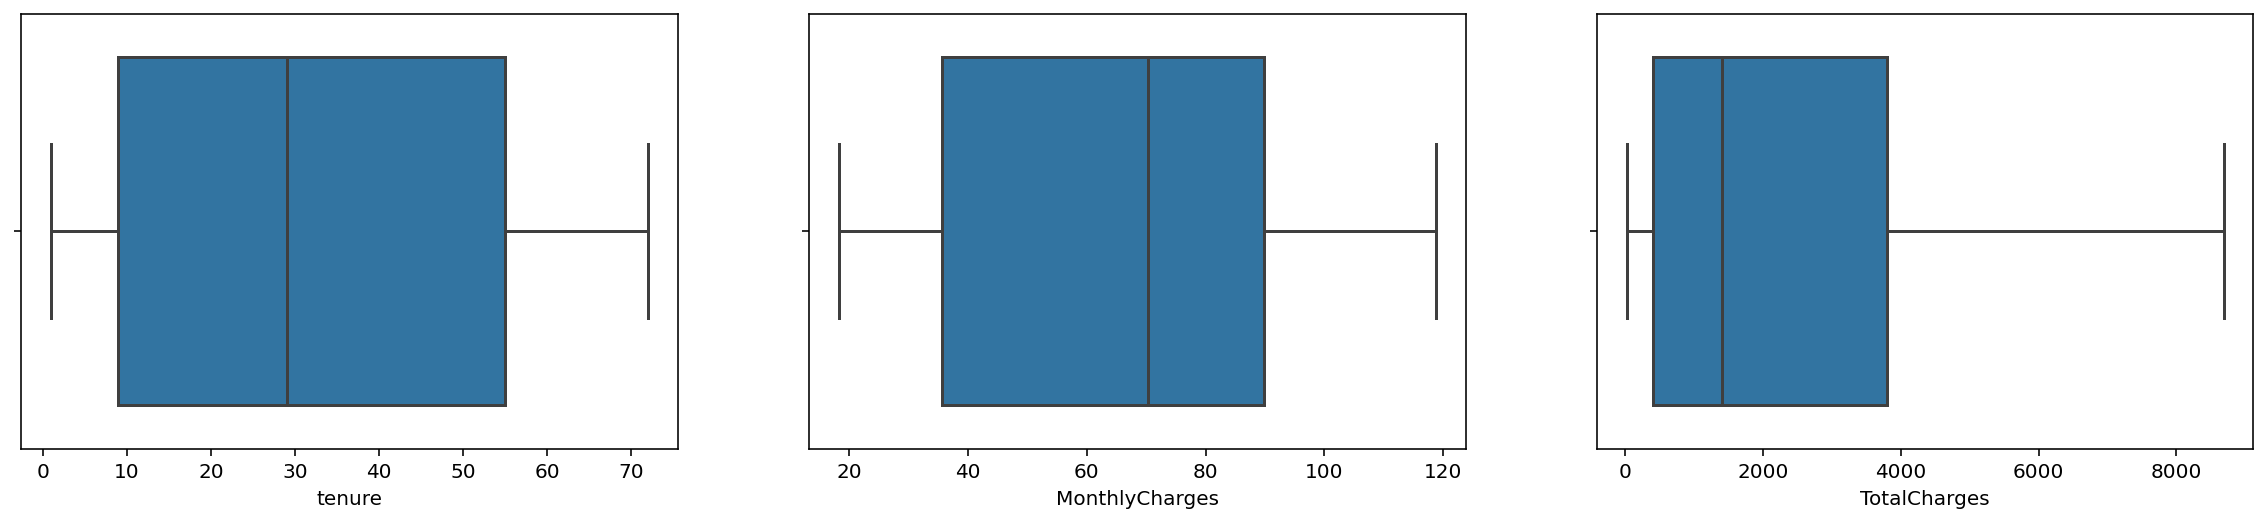

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# boxplot 그려서 확인
# 1) age, pdays
plt.figure(figsize=(20, 4))

plt.subplot(131)
sns.boxplot(x="tenure", data=df)

plt.subplot(132)
sns.boxplot(x="MonthlyCharges", data=df[ df["MonthlyCharges"] != -1])

plt.subplot(133)
sns.boxplot(x="TotalCharges", data=df[ df["TotalCharges"] != -1])

plt.show();


## 분류 문제이기 때문에 기준모델은 최빈값으로 설정한다.

No     5163
Yes    1869
Name: Churn, dtype: int64
No     0.734215
Yes    0.265785
Name: Churn, dtype: float64


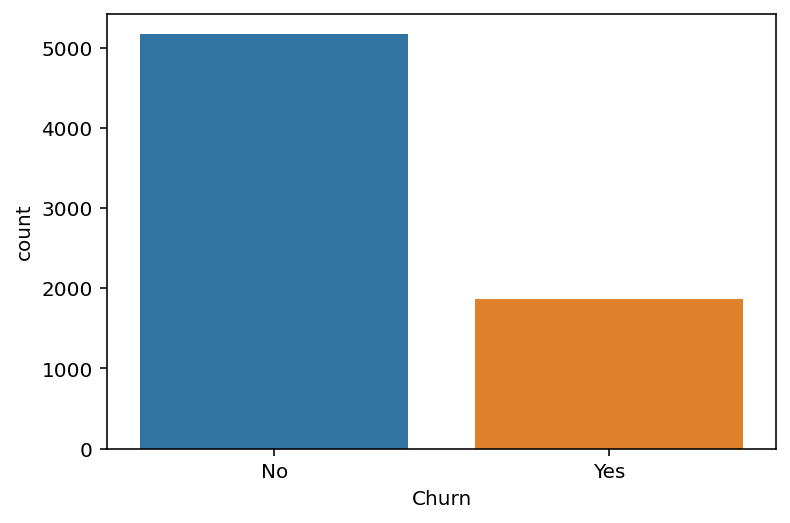

In [ ]:
# target인 Churn으로 확인
print(df.Churn.value_counts())
print(df.Churn.value_counts(normalize=True))

# 시각화로 확인
%matplotlib inline
sns.countplot(data = df, x = 'Churn')

이탈하지 않은 고객이 약 73%, 이탈한 고객이 26%이다. 
불균형한 데이터이다.   
분류 문제에서 클래스 비율이 50~70%인 경우는 accuracy만 사용해도 괜찮지만 이 클래스는 70를 약간 넘는다.   
성능을 정확히 판단하기 위해 precision, recall, f1 등을 평가지표로 함께 사용한다.

## 데이터 시각화
### 1. 범주형

In [ ]:
# 특성별 값 확인
df_uni = df.nunique()

# 특성별 값이 5개 이하인 컬럼들이 모두 범주형임을 위에서 확인했으므로 그 조건으로 변수 저장
category = df_uni[df_uni < 5]

# 컬럼명 리스트로 추출
category = category.index.to_list()
category

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

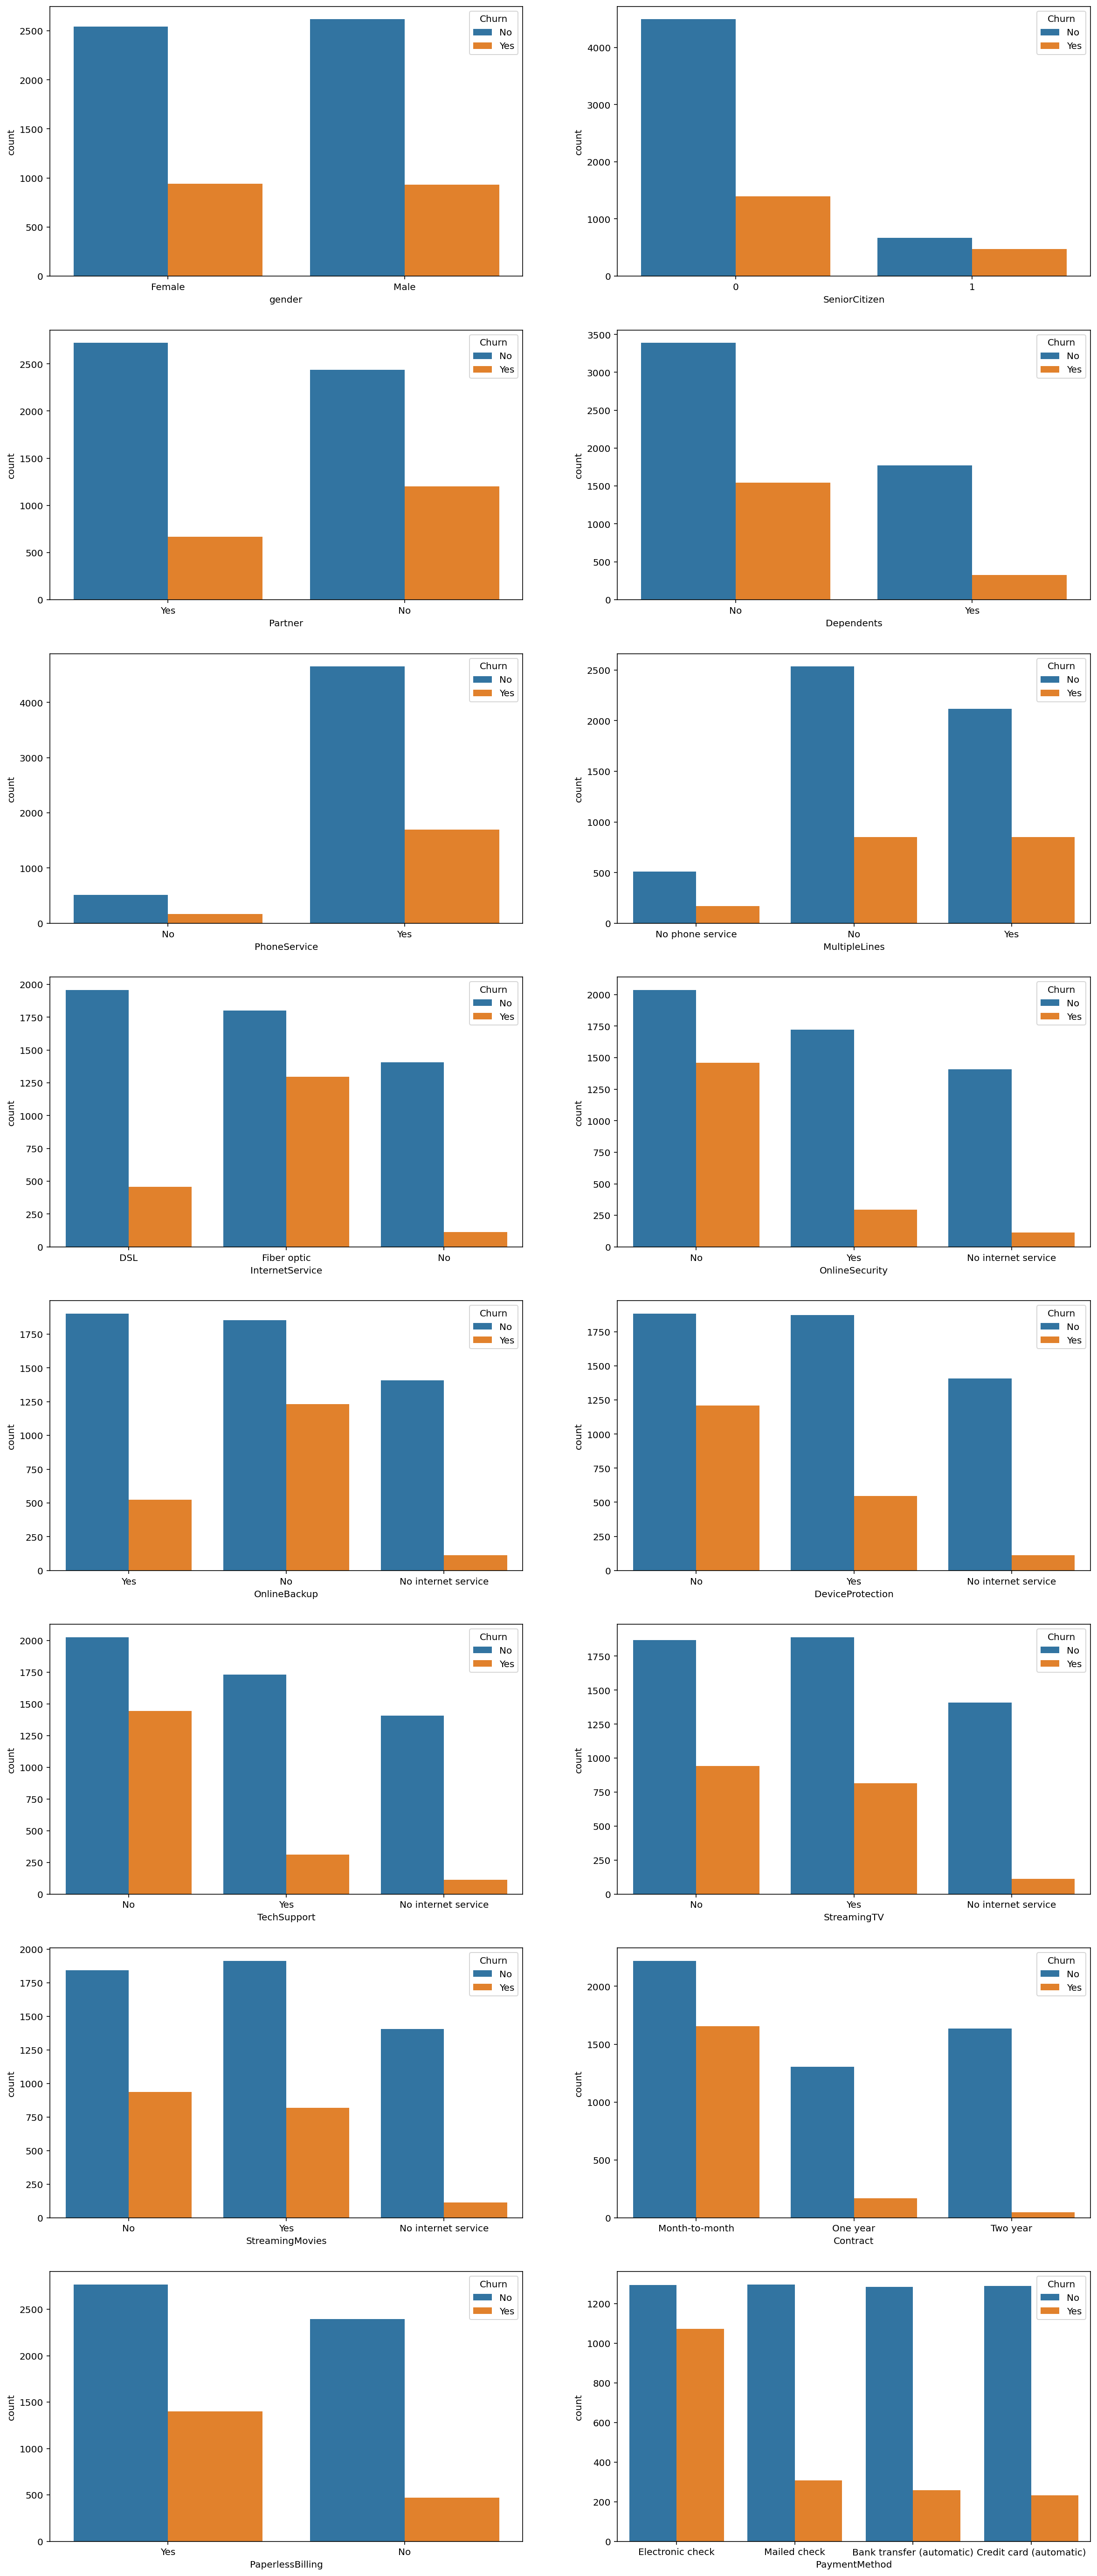

In [ ]:
col_len = len(category)

fig, axes = plt.subplots(nrows = 8, ncols = 2, figsize=(20, 50))
for i, col_len in enumerate(category[:-1]): # 마지막 'Churn'은 제거
    row = i // 2
    col = i % 2
#     print(row, col)
    sns.countplot(data = df, x = col_len, hue="Churn", ax = axes[row, col])

고령자인 경우   
파트가 없는 경우  
피부양자가 없는 경우   
인터넷 서비스를 fiber optic을 사용하는 경우   
인터넷 가입자가 온라인 보안 서비스를 사용하지 않는 경우   
인터넷 가입자가 온라인 백업 서비스를 사용하지 않는 경우   
인터넷 가입자가 장비 보호 서비스 안쓰는 경우   
인터넷 가입자가 기술지원을 받지 않는경우   
매월 결제인 경우   
종이 청구서를 사용하는 경우      
전자 수표를 사용하는 경우  
   
      
  
해지율이 큰 것으로 보인다.

### 2. 연속형

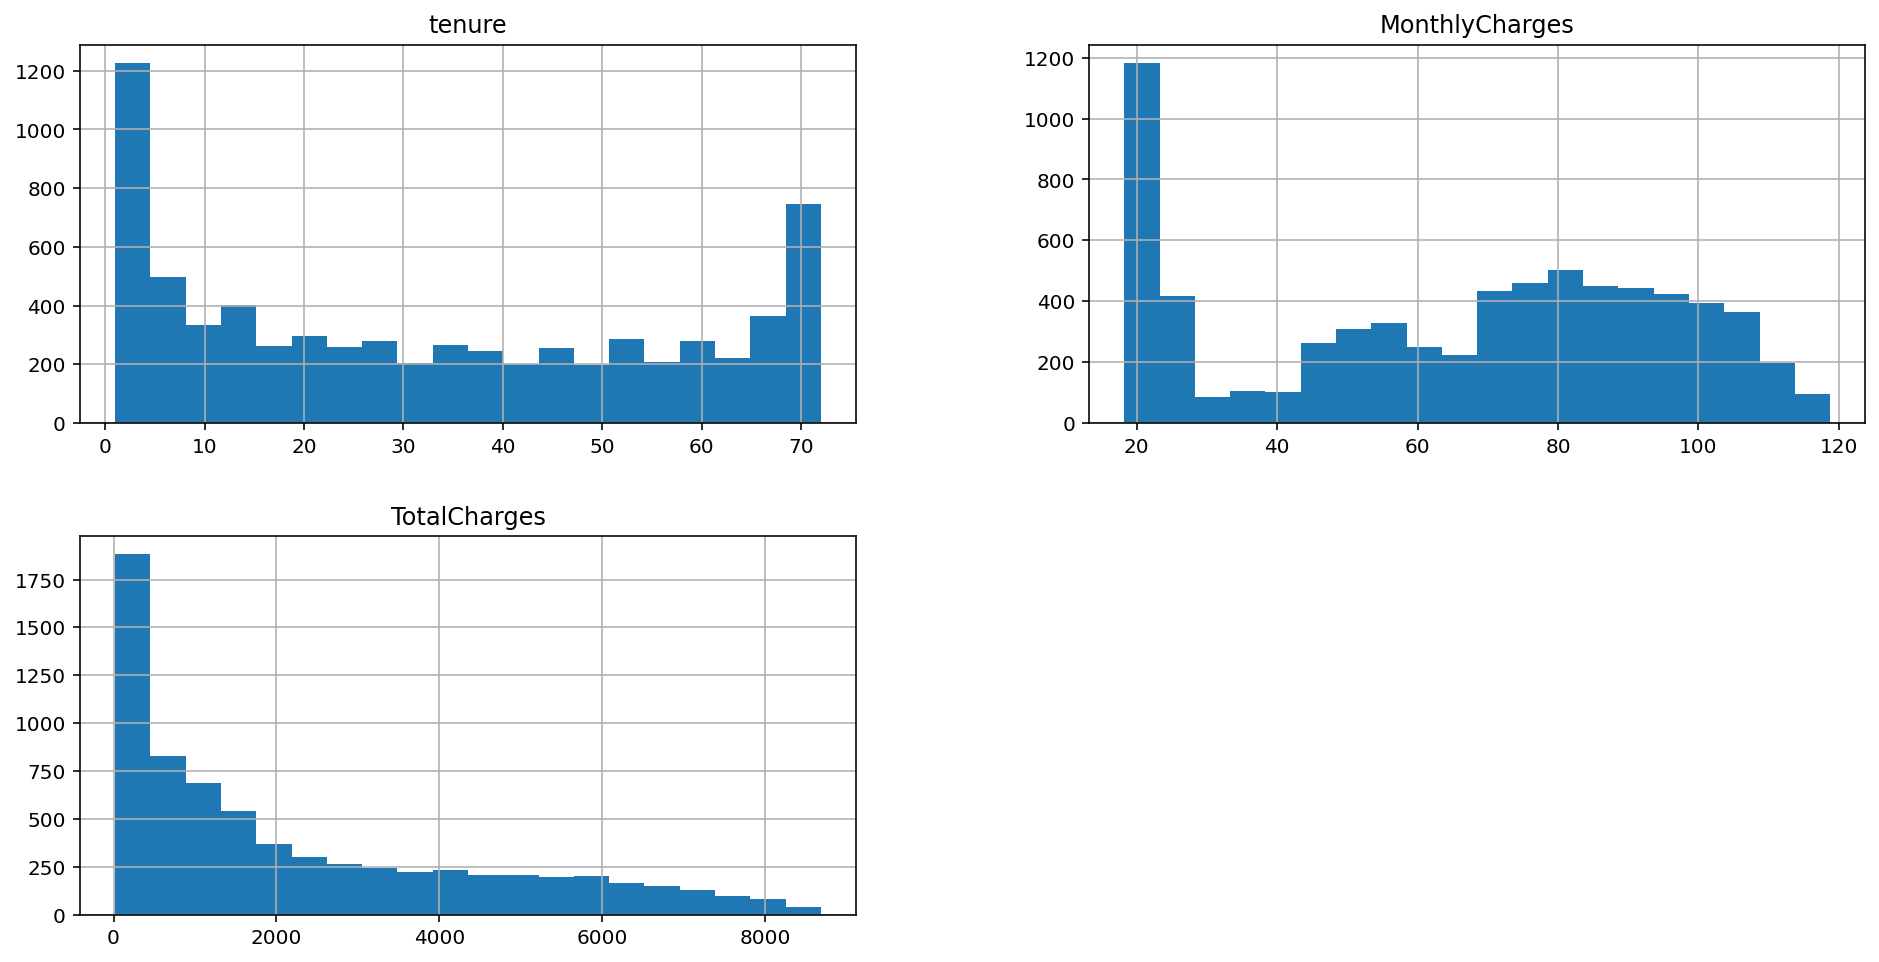

In [ ]:
df.hist(bins=20, figsize=(16, 8));

In [ ]:
# 연속형 데이터만 추출하여 새로 변수에 담기
number = df.select_dtypes(include = 'number')

# Churn 추가
number['Churn'] = df['Churn']

number.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,tenure,MonthlyCharges,TotalCharges,Churn
customerID,,,,
7590-VHVEG,1,29.85,29.85,No
5575-GNVDE,34,56.95,1889.50,No
3668-QPYBK,2,53.85,108.15,Yes


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.05 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.05 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.05 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


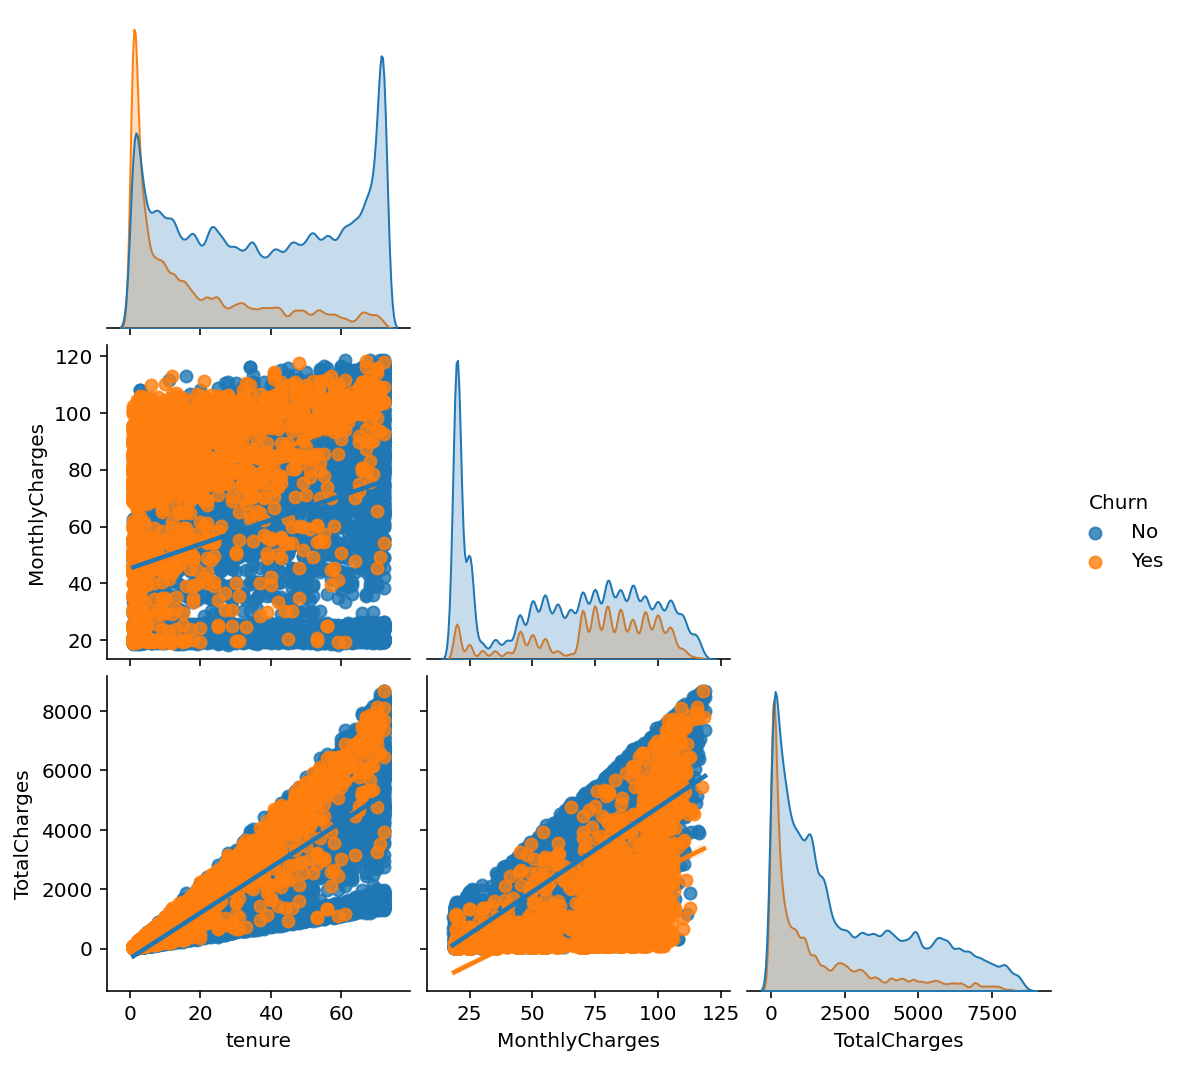

In [ ]:
sns.pairplot(number, hue = 'Churn', kind = 'reg', diag_kws = {"bw":.05}, corner = True)

### 상관 관계
연속형 특성과, 이진형 특성으로 어떤 상관관계가 있는지 보자.   
먼저 우리 예측 target인 Churn을 기준으로 확인한다.   
다음으로 나머지 특성들끼리 상관관계 여부도 본다. 추후 모델링 성능 저하 요인이 될 수 있기 때문이다.
<br>   
따라서 binary는 boolean형으로 변경해준다.

In [ ]:
df2 = df.copy()

In [ ]:
# 이진형 특성들을 boolean으로 변경 후 새로운 컬럼에 생성

df2['gender_b'] = (df2['gender'] == 'Male')
df2['SeniorCitizen_b'] = (df['SeniorCitizen'] == 1)
df2['Partner_b'] = (df2['Partner'] == 'Yes')
df2['Dependents_b'] = (df2['Dependents'] == 'Yes')
df2['PhoneService_b'] = (df2['PhoneService'] == 'Yes')
df2['PaperlessBilling_b'] = (df2['PaperlessBilling'] == 'Yes')
df2['Churn_b'] = (df2['Churn'] == 'Yes')

In [ ]:
df2.corr()

,tenure,MonthlyCharges,TotalCharges,gender_b,SeniorCitizen_b,Partner_b,Dependents_b,PhoneService_b,PaperlessBilling_b,Churn_b
tenure,1.000000,0.246862,0.825880,0.005285,0.015683,0.381912,0.163386,0.007877,0.004823,-0.354049
MonthlyCharges,0.246862,1.000000,0.651065,-0.013779,0.219874,0.097825,-0.112343,0.248033,0.351930,0.192858
TotalCharges,0.825880,0.651065,1.000000,0.000048,0.102411,0.319072,0.064653,0.113008,0.157830,-0.199484
gender_b,0.005285,-0.013779,0.000048,1.000000,-0.001819,-0.001379,0.010349,-0.007515,-0.011902,-0.008545
SeniorCitizen_b,0.015683,0.219874,0.102411,-0.001819,1.000000,0.016957,-0.210550,0.008392,0.156258,0.150541
Partner_b,0.381912,0.097825,0.319072,-0.001379,0.016957,1.000000,0.452269,0.018397,-0.013957,-0.149982
Dependents_b,0.163386,-0.112343,0.064653,0.010349,-0.210550,0.452269,1.000000,-0.001078,-0.110131,-0.163128
PhoneService_b,0.007877,0.248033,0.113008,-0.007515,0.008392,0.018397,-0.001078,1.000000,0.016696,0.011691
PaperlessBilling_b,0.004823,0.351930,0.157830,-0.011902,0.156258,-0.013957,-0.110131,0.016696,1.000000,0.191454
Churn_b,-0.354049,0.192858,-0.199484,-0.008545,0.150541,-0.149982,-0.163128,0.011691,0.191454,1.000000


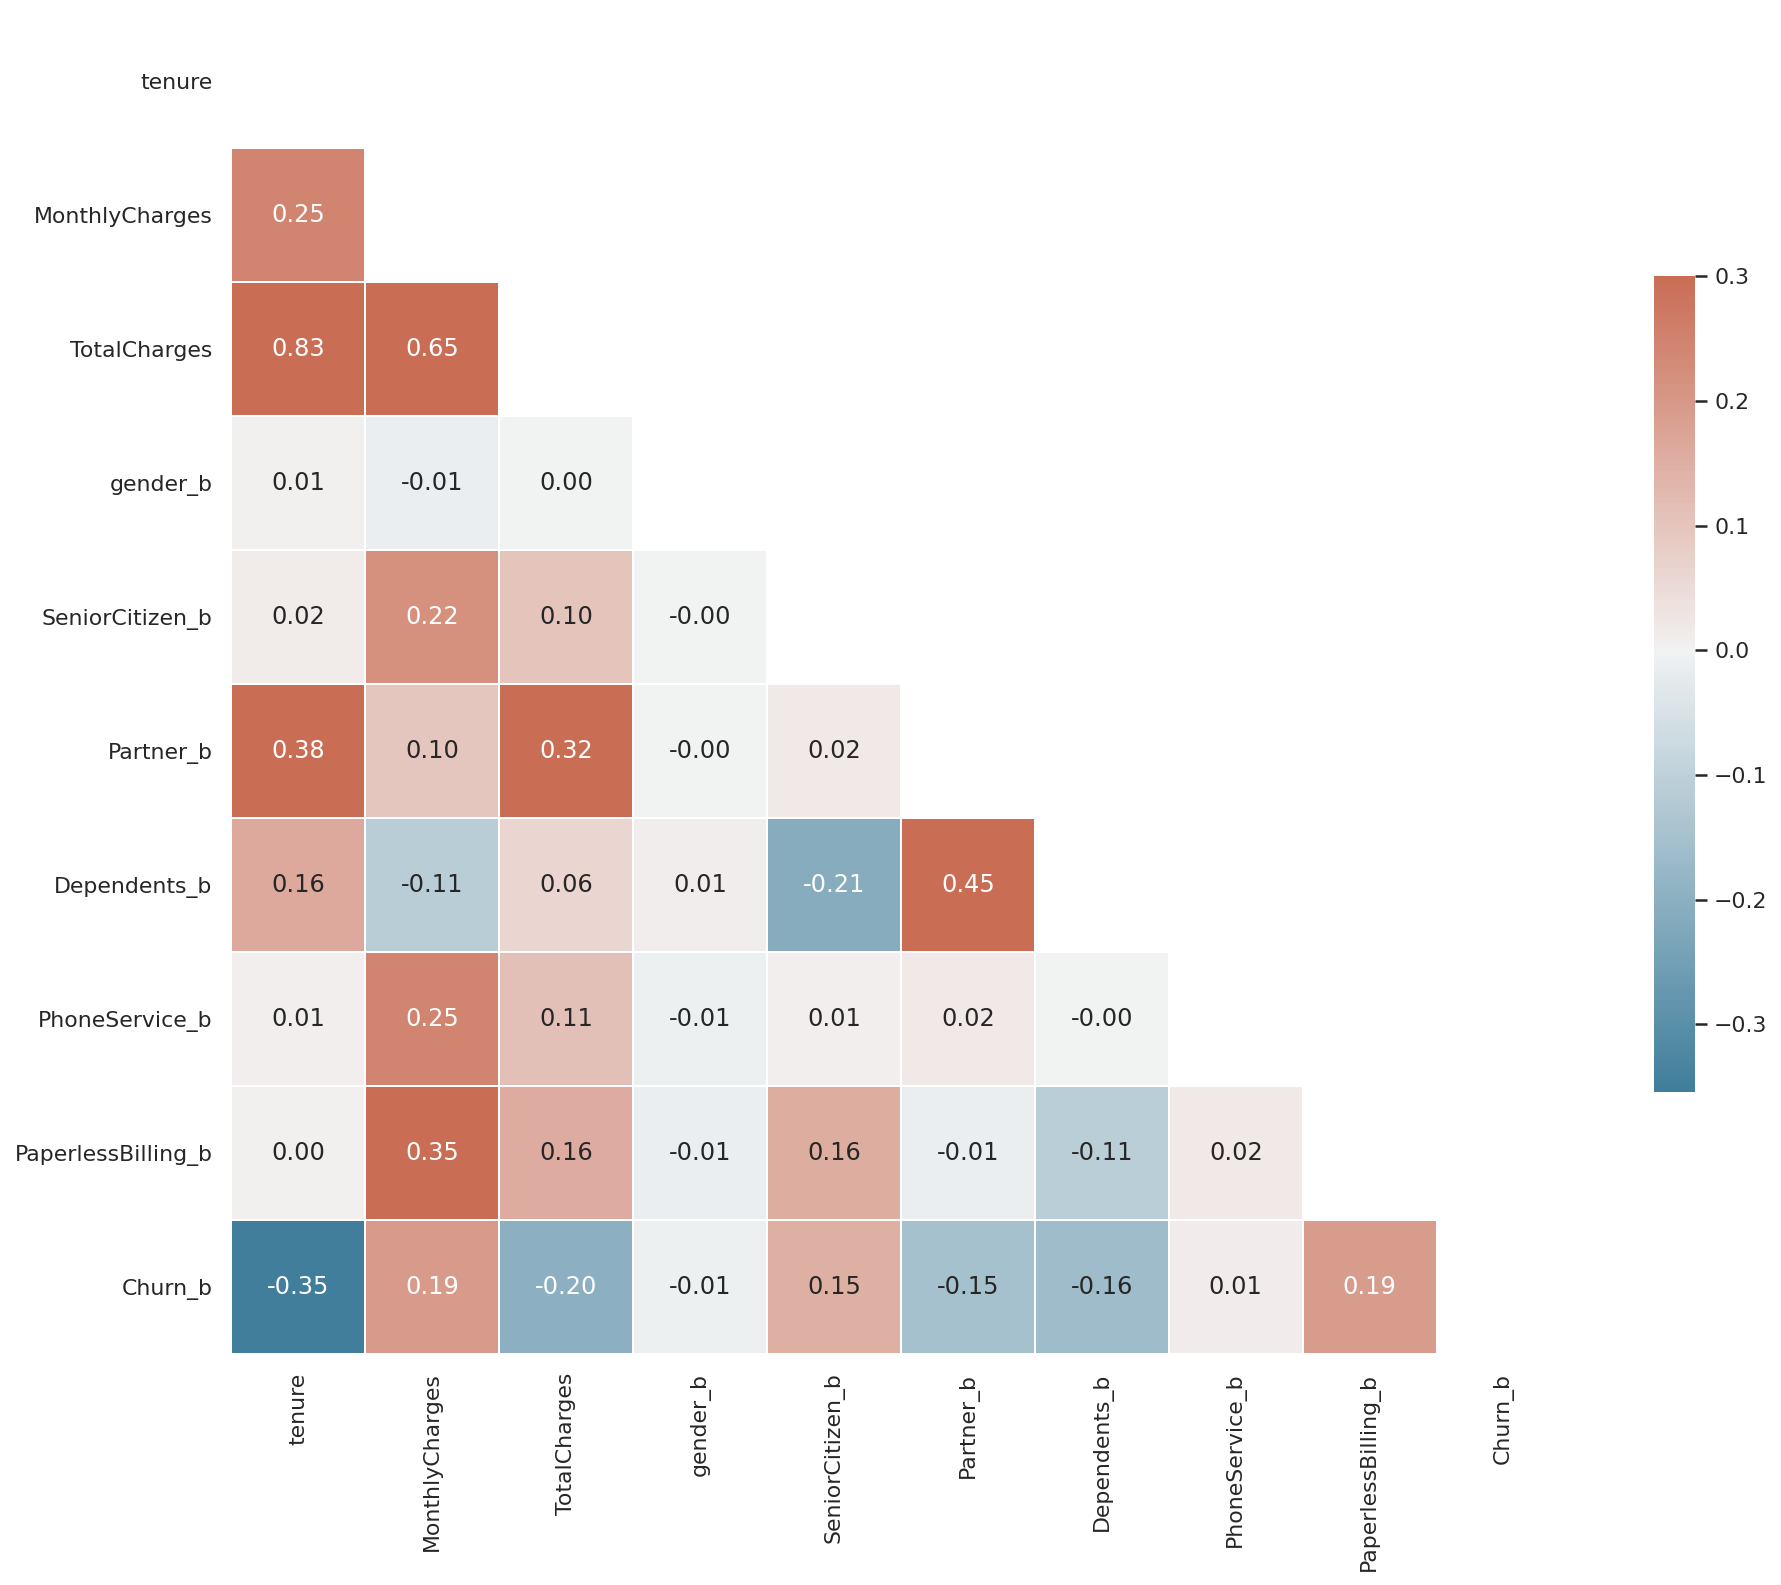

In [ ]:
from string import ascii_letters
import numpy as np

sns.set_theme(style="white")

# 상관관계 계산
corr = df2.corr()

# 윗쪽 삼각형 감추기
mask = np.triu(np.ones_like(corr, dtype = np.bool))

f, ax = plt.subplots(figsize=(15, 15))

# 컬러맵 설정
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# 그리기
sns.heatmap(corr, annot = True, fmt = ".2f", mask = mask, cmap = cmap, vmax = .3, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})


### 특성 구간 나누기

In [ ]:
num_names = number.columns.tolist()
num_names.remove('Churn')
num_names

['tenure', 'MonthlyCharges', 'TotalCharges']

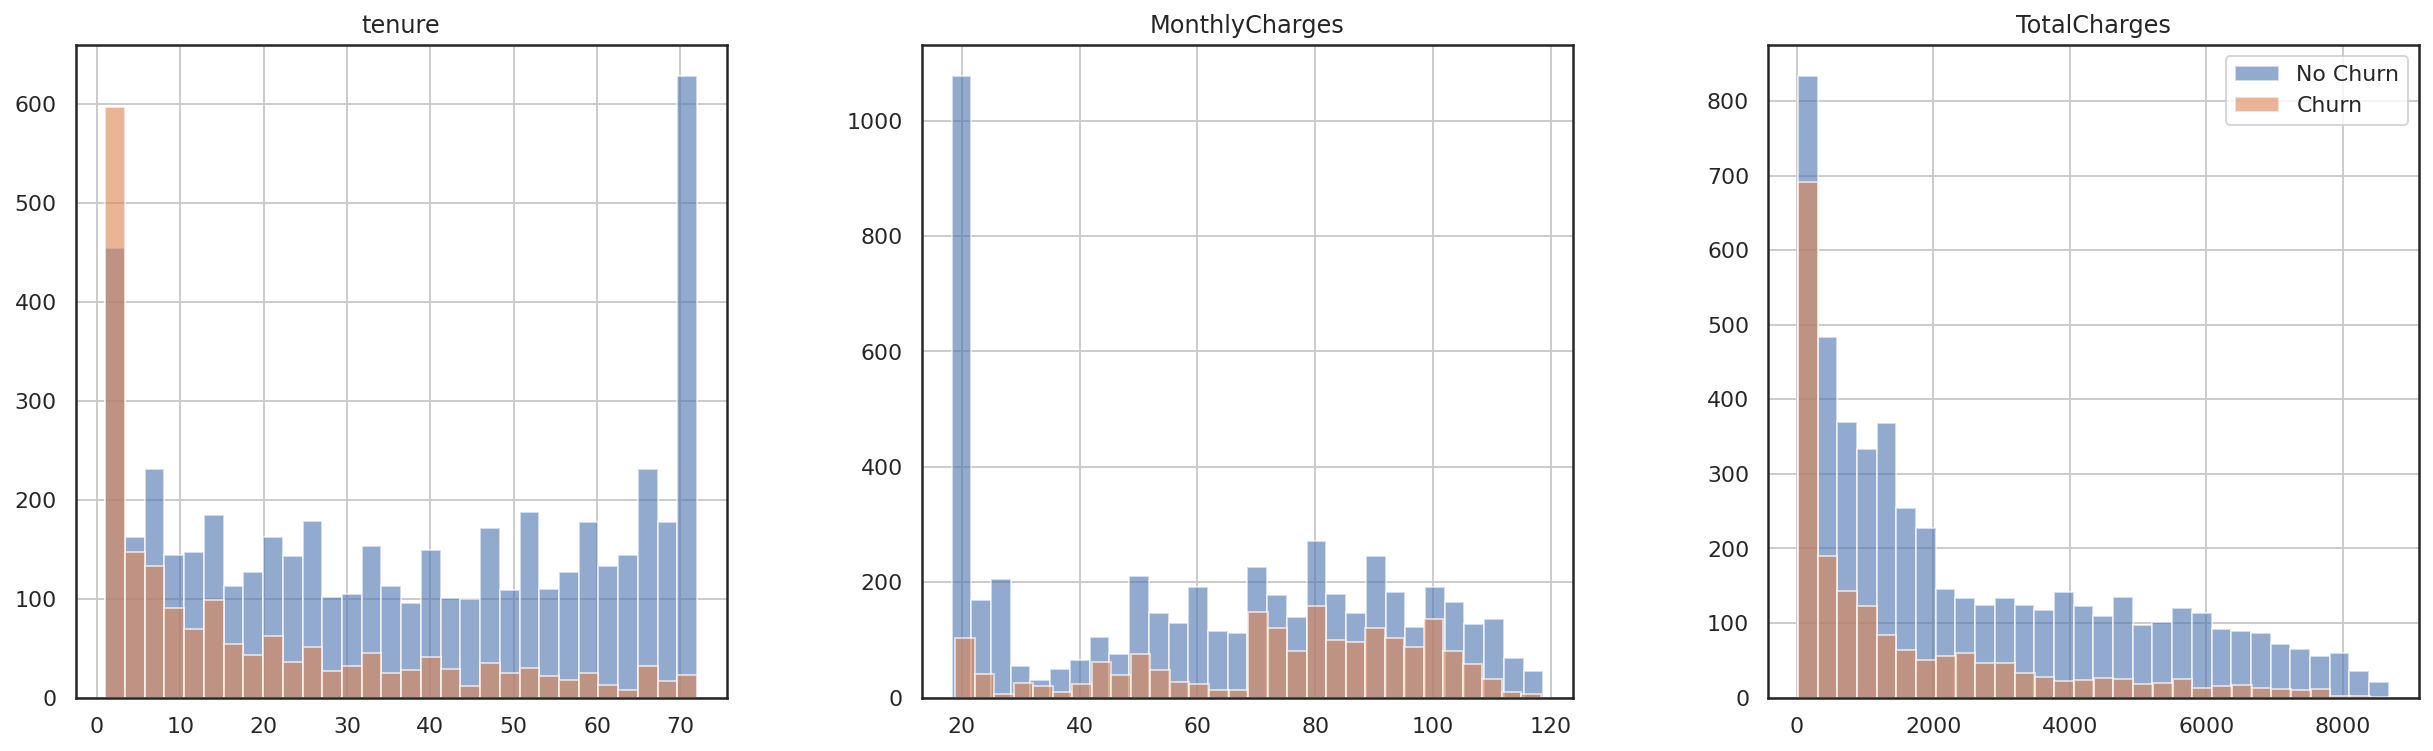

In [ ]:
# 연속형 특성별 Churn 분포 확인
fig, axes = plt.subplots(1, 3, figsize = (21, 6))

df.loc[df2['Churn_b'] == False, num_names].hist(bins = 30, alpha = .6, ax = axes)
df.loc[df2['Churn_b'] == True, num_names].hist(bins = 30, alpha = .6, ax = axes)

plt.legend(['No Churn', 'Churn']);

In [ ]:
# tenure 를 20, 40, 60 으로 분할
def tenure_split(df) : 
    if df["tenure"] <=20:
        return "0-20"
    elif df["tenure"] > 20 and df["tenure"] <= 40:
        return "20-40"
    elif df["tenure"] > 40 and df["tenure"] <= 60:
        return "40-60"
    else:
        return "60plus"
        
        
df['tenure_group'] = df.apply(tenure_split, axis = 1)
df[['tenure', 'tenure_group']].sample(10)

,tenure,tenure_group
customerID,,
8548-AWOFC,66,60plus
1393-IMKZG,1,0-20
6481-LXPWL,56,40-60
3914-FDRHP,9,0-20
5149-TGWDZ,21,20-40
0567-GGCAC,7,0-20
9330-VOFSZ,60,40-60
2905-KFQUV,2,0-20
2080-SRCDE,1,0-20


In [ ]:
# monthlycharges_split 을 30, 70, 100 으로 분할
def monthlycharges_split(df) :   
    if df['MonthlyCharges'] <= 30 :
        return '0-30'
    elif (df['MonthlyCharges'] > 30) & (df['MonthlyCharges'] <= 70 ):
        return '30-70'
    elif (df['MonthlyCharges'] > 70) & (df['MonthlyCharges'] <= 99 ):
        return '70-99'
    elif df['MonthlyCharges'] > 99 :
        return '99plus'
    
df['monthlycharges_group'] = df.apply(monthlycharges_split, axis = 1)
df[['MonthlyCharges', 'monthlycharges_group']].head()

,MonthlyCharges,monthlycharges_group
customerID,,
7590-VHVEG,29.85,0-30
5575-GNVDE,56.95,30-70
3668-QPYBK,53.85,30-70
7795-CFOCW,42.30,30-70
9237-HQITU,70.70,70-99


In [ ]:
# TotalCharges 를 2000, 4000, 6000 으로 분할
def totalcharges_split(df) :   
    if df['TotalCharges'] <= 2000 :
        return '0-2k'
    elif df['TotalCharges'] > 2000 and df['TotalCharges'] <= 4000:
        return '2k-4k'
    elif df['TotalCharges'] > 4000 and df['TotalCharges'] <= 6000:
        return '4k-6k'
    else:
        return '6kplus'
    

df['totalcharges_group'] = df.apply(totalcharges_split, axis = 1)
df[['TotalCharges', 'totalcharges_group']].sample(10)

,TotalCharges,totalcharges_group
customerID,,
7694-VLBWQ,7040.85,6kplus
3307-TLCUD,592.75,0-2k
8775-ERLNB,74.30,0-2k
9025-AOMKI,536.40,0-2k
6416-YJTTB,795.65,0-2k
9210-IAHGH,450.80,0-2k
2921-XWDJH,3147.15,2k-4k
8292-ITGYJ,1138.80,0-2k
5146-YYFRZ,1311.75,0-2k


In [ ]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,monthlycharges_group,totalcharges_group
customerID,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-20,0-30,0-2k
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,20-40,30-70,0-2k
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-20,30-70,0-2k


In [ ]:
df_c = df.drop(['tenure', 'MonthlyCharges', 'TotalCharges'], axis = 1).copy()
df_c.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure_group,monthlycharges_group,totalcharges_group
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0-20,0-30,0-2k
5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,20-40,30-70,0-2k
3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0-20,30-70,0-2k


## 데이터 분할

In [ ]:
target = 'Churn'

In [ ]:
# train / validation / test 데이터셋 분리
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.20, 
                              stratify = df[target], random_state = 2)

train, val = train_test_split(train, test_size = 0.25, 
                              stratify = train[target], random_state = 2)


train.shape, val.shape, test.shape

((4218, 23), (1407, 23), (1407, 23))

## 정보 누수(leakage) 확인 

In [ ]:
for item in [train, val, test]:
  item[target] = (item[target] == 'Yes')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
pip install --upgrade category_encoders

     |████████████████████████████████| 81kB 8.5MB/s 


In [ ]:
from category_encoders import OneHotEncoder

from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# feature Matrix와 target vector 나누기
features = train.columns.drop([target])

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

print("feature Matrix: ", X_train.shape, X_val.shape, X_test.shape)
print("target vector: ", y_train.shape, y_val.shape, y_test.shape)

feature Matrix:  (4218, 22) (1407, 22) (1407, 22)
target vector:  (4218,) (1407,) (1407,)


In [ ]:

from xgboost import XGBClassifier
from sklearn.metrics import classification_report


In [ ]:
# 파이프라인 생성 원핫
pipe = make_pipeline(
    OneHotEncoder(),
    XGBClassifier(n_jobs=-1, random_state=1)
)
pipe.fit(X_train, y_train)

# 예측
y_pred = pipe.predict(X_val)

# 결과 확인
print("validation 정확도: ", pipe.score(X_val, y_val))
print("validation f1_score: ", f1_score(y_val, y_pred))

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


validation 정확도:  0.8137882018479033
validation f1_score:  0.5993883792048929


In [ ]:
# 인코더 생성 원핫
encoder = OneHotEncoder()

# 인코딩
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

# 모델 생성
model = XGBClassifier(n_estimators=10000,
                      max_depth=5, learning_rate=0.4, n_jobs=-1
)


eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          eval_metric='error',
          early_stopping_rounds=3)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


[0]	validation_0-error:0.200806	validation_1-error:0.191187
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 3 rounds.
[1]	validation_0-error:0.187293	validation_1-error:0.196873
[2]	validation_0-error:0.178758	validation_1-error:0.186212
[3]	validation_0-error:0.178046	validation_1-error:0.189765
[4]	validation_0-error:0.176387	validation_1-error:0.191187
[5]	validation_0-error:0.174727	validation_1-error:0.190476
Stopping. Best iteration:
[2]	validation_0-error:0.178758	validation_1-error:0.186212



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.4, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

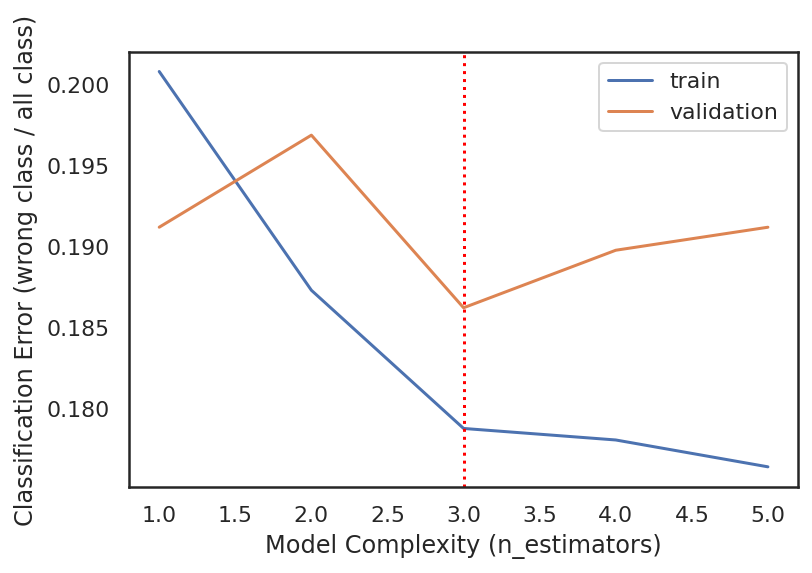

In [ ]:
# 결과 확인 원핫
result = model.evals_result()

train_error = result['validation_0']['error']
val_error = result['validation_1']['error']

# 시각화
idx = range(1, len(train_error)+1)

# train error, validation error
plt.plot(idx, train_error, label='train')
plt.plot(idx, val_error, label='validation')

# legend 설정
plt.legend()

# x, y축 설정
plt.xlabel('Model Complexity (n_estimators)')
plt.ylabel('Classification Error (wrong class / all class)')

# 3에 선 표시
plt.axvline(3, color='red', linestyle=':')
plt.show();

그래프로 확인하니 3이 Best iteration에 적당해보인다.

In [ ]:
# score 확인 원핫
y_pred = model.predict(X_val_encoded)
print("validation 정확도: ", model.score(X_val_encoded, y_val))
print("validation f1_score: ", f1_score(y_val, y_pred))

validation 정확도:  0.8137882018479033
validation f1_score:  0.598159509202454


In [ ]:
#원핫
print(classification_report(y_val, model.predict(X_val_encoded)))


              precision    recall  f1-score   support

       False       0.84      0.92      0.88      1033
        True       0.70      0.52      0.60       374

    accuracy                           0.81      1407
   macro avg       0.77      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407



In [ ]:
# test 데이터셋 score 확인 원핫
y_pred_test = model.predict(X_test_encoded)
print("test 정확도: ", model.score(X_test_encoded, y_test))
print("test f1_score: ", f1_score(y_test, y_pred_test))

test 정확도:  0.7860696517412935
test f1_score:  0.5605839416058395


In [ ]:
train, test = train_test_split(df, test_size = 0.20, 
                              stratify = df[target], random_state = 2)

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [ ]:
from category_encoders import OrdinalEncoder

# 인코더 생성 Ordinal
encoder = OrdinalEncoder()

# 인코딩
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


In [ ]:


# 인코더 생성 원핫
encoder = OneHotEncoder()

# 인코딩
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
# 정규화를 위한 함수 호출
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[:10])

[[-1.01739573e+00 -4.47070480e-01 -9.77323706e-01 -6.54792225e-01
  -1.27986640e+00 -3.27874178e-01 -9.43083948e-01 -9.93711132e-01
  -9.05550930e-01 -9.97102997e-01 -1.02408295e+00 -9.28902017e-01
  -1.07528630e+00 -1.08789521e+00 -8.32215782e-01 -1.20634146e+00
  -1.15375917e+00  1.25279798e-01 -9.75881536e-01 -1.01282696e+00
  -1.27298585e+00 -7.21417881e-01]
 [-1.01739573e+00  2.23678379e+00 -9.77323706e-01 -6.54792225e-01
  -1.27986640e+00 -3.27874178e-01 -9.43083948e-01 -9.93711132e-01
  -9.05550930e-01  2.85766252e-01 -1.02408295e+00 -9.28902017e-01
  -1.07528630e+00 -1.08789521e+00 -8.32215782e-01  8.28952693e-01
  -1.15375917e+00  2.69540552e-01 -9.73969474e-01 -1.01282696e+00
  -2.71651014e-01 -7.21417881e-01]
 [-1.01739573e+00 -4.47070480e-01 -9.77323706e-01 -6.54792225e-01
  -1.49791664e-02 -3.27874178e-01  5.81735600e-01  2.88019003e-01
   3.49060888e-01 -9.97102997e-01 -1.02408295e+00 -9.28902017e-01
   2.35612147e-01  2.27824110e-01  3.71490511e-01 -1.20634146e+00
  -2.8

In [ ]:
y_train = y_train.replace({'No' : 0, 'Yes' : 1})
y_test = y_test.replace({'No' : 0, 'Yes' : 1})

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow

tensorflow.random.set_seed(7)

# 중요한 하이퍼 파라미터들
inputs = X_train.shape[1]
epochs = 50                  # 전체 반복횟수
batch_size = 100             # 한번에 학습하는 사이즈


# 모델을 생성합니다
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (inputs,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

# Compile Model
model.compile(optimizer = 'adam'
             , loss = 'binary_crossentropy'
             , metrics = ['accuracy'])

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 10, verbose = 1)

# Fit Model
model.fit(X_train, y_train, 
          validation_data = (X_test,y_test),  # validation set
          epochs = epochs,                    # 전체 반복횟수
          batch_size = batch_size,            # 한번에 학습하는 사이즈
          callbacks=[early_stop]
         )

Epoch 1/50
57/57 [==============================] - 1s 5ms/step - loss: 0.5208 - accuracy: 0.7509 - val_loss: 0.4314 - val_accuracy: 0.7804
Epoch 2/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4423 - accuracy: 0.7905 - val_loss: 0.4155 - val_accuracy: 0.7889
Epoch 3/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4215 - accuracy: 0.8112 - val_loss: 0.4150 - val_accuracy: 0.7932
Epoch 4/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4003 - accuracy: 0.8218 - val_loss: 0.4140 - val_accuracy: 0.7932
Epoch 5/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4064 - accuracy: 0.8183 - val_loss: 0.4139 - val_accuracy: 0.7989
Epoch 6/50
57/57 [==============================] - 0s 3ms/step - loss: 0.3981 - accuracy: 0.8118 - val_loss: 0.4276 - val_accuracy: 0.7932
Epoch 7/50
57/57 [==============================] - 0s 3ms/step - loss: 0.3903 - accuracy: 0.8219 - val_loss: 0.4281 - val_accuracy: 0.7889
Epoch 8/50
57/57 [==

In [ ]:
pip freeze > requirements.txt